In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
iris = sns.load_dataset('iris')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
iris.shape

(150, 5)

AxesSubplot(0.125,0.125;0.775x0.755)


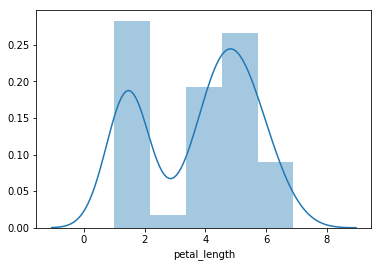

In [21]:
# What does the distribution of petal lengths look like?
print(sns.distplot(iris.petal_length))

,petal_length,petal_width
petal_length,1.000000,0.962865
petal_width,0.962865,1.000000


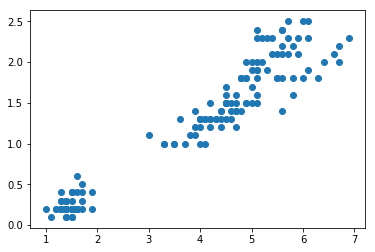

In [13]:
# Is there a correlation between petal length and petal width?
print(plt.scatter(x=iris.petal_length, y=iris.petal_width))
iris[['petal_length', 'petal_width']].corr()

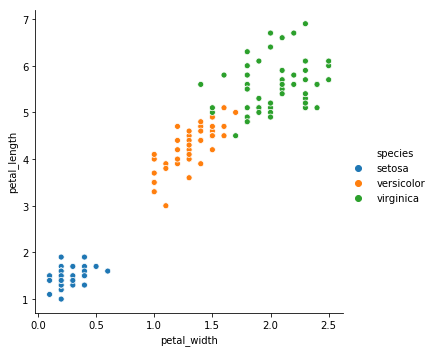

In [18]:
# Would it be reasonable to predict species based on sepal width and sepal length?
sns.relplot(data=iris, y='petal_length', x='petal_width', hue='species')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


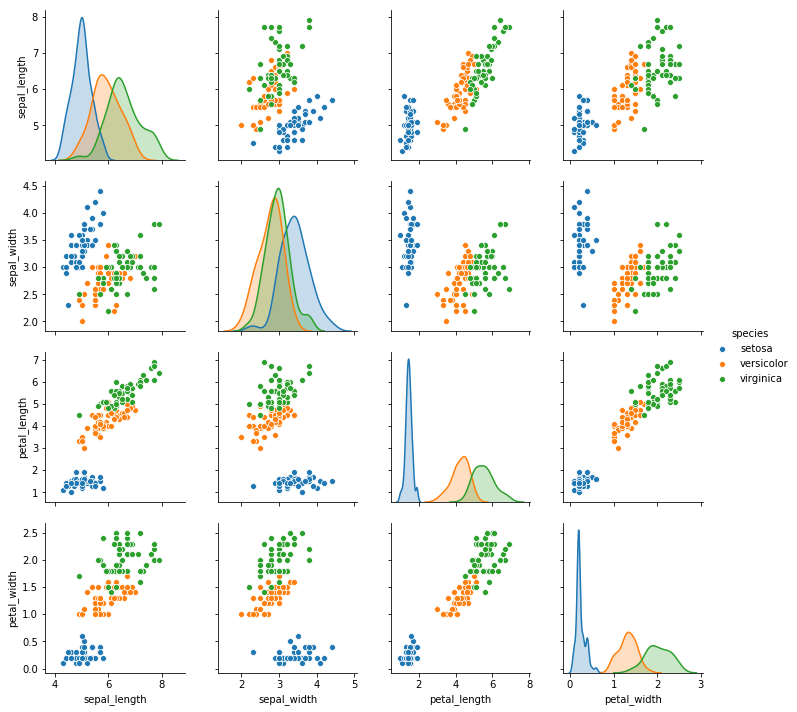

In [67]:
# Which features would be best used to predict species?
print(sns.pairplot(iris, hue='species'))
iris.corr()

In [44]:
# Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. 
# Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. 
# What do you notice?

anscombe = sns.load_dataset('anscombe')
anscombe.sample(10)
# students[['shoe_sizes','fav_num']].agg([np.mean, 'min', 'max'])
anscombe[['dataset','x','y']].groupby('dataset').agg(np.mean, 'min', 'max')

""


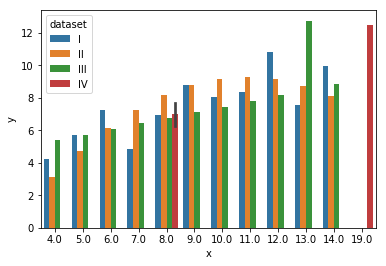

In [32]:
# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.
sns.barplot(data=anscombe, x='x', y='y', hue='dataset')

In [46]:
# Load the InsectSprays dataset and read it's documentation. 
from pydataset import data

In [52]:
insp = data('InsectSprays')
insp

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A
6,12,A
7,10,A
8,23,A
9,17,A
10,20,A


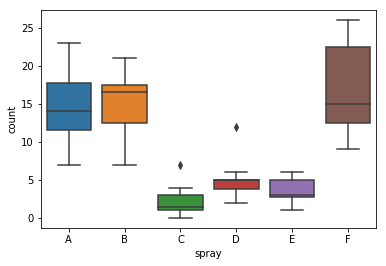

In [53]:
# Create a boxplot that shows the 
# effectiveness of the different insect sprays.
sns.boxplot(data=insp, y='count', x='spray')

In [58]:
# Load the swiss dataset and read it's documentation. Create visualizations to answer the 
#following questions:

swiss = data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [64]:
# Create a column named is_catholic that holds a boolean value of whether or not the province is 
# Catholic. (Choose a cutoff point for what constitutes catholic)
# df.assign(curved_math =df.math + 10)
is_catholic = swiss.assign(is_Catholic = swiss.Catholic > 50)
is_catholic.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_Catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


In [68]:
# Does whether or not a province is Catholic influence fertility?
is_catholic[['Fertility', 'is_Catholic']].corr()
# No, the correlation is only .4028.

,Fertility,is_Catholic
Fertility,1.000000,0.402813
is_Catholic,0.402813,1.000000


In [69]:
# What measure correlates most strongly with fertility?
swiss.corr()
# Examination, education have the strongest correlations to fertility.

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000


In [70]:
def get_db_url(db, user, host, password):
    from sqlalchemy import create_engine
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return create_engine(url)

In [75]:
import pandas as pd
from env import user, host, password

In [78]:
conn = get_db_url('chipotle', user, host, password)

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [79]:
chip = pd.read_sql('select * from orders;', conn)
chip

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",$10.98
6,7,3,1,Side of Chips,nan,$1.69
7,8,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour...",$11.75
8,9,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25
9,10,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25


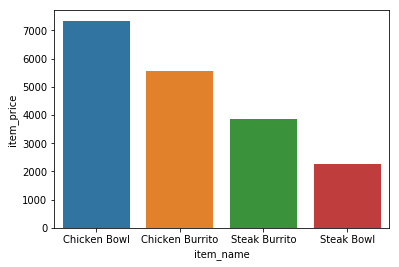

In [114]:
# Using the chipotle dataset from the previous exercise, create a barplot that shows the 4 most popular items 
# and the revenue produced by each.
# chip.item_price = chip.item_price.str.replace('$', '').astype('float')
chip.head()
top_four = chip[['item_name', 'item_price']].groupby('item_name', as_index=False).sum().nlargest(4, 'item_price')
sns.barplot(x = 'item_name', y = 'item_price', data = top_four)

In [117]:
# Load the sleepstudy data and read it's documentation. 
sleep = data('sleepstudy')
sleep.sample(20)


,Reaction,Days,Subject
79,335.7469,8,334
164,281.7895,3,371
6,414.6901,5,308
62,289.5550,1,333
97,404.2601,6,337
56,309.9976,5,332
36,297.5855,5,330
173,297.5968,2,372
60,253.8644,9,332
77,305.5248,6,334


In [116]:
sleep = data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [119]:
sleep

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
6,414.6901,5,308
7,382.2038,6,308
8,290.1486,7,308
9,430.5853,8,308
10,466.3535,9,308


/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


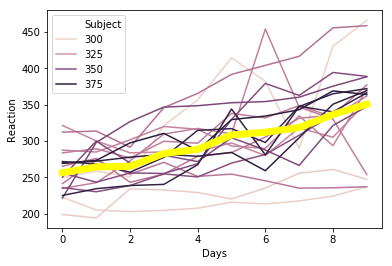

In [135]:
# Use seaborn to create a line plot of all the individual subject's reaction times and a more prominant line 
# showing the average change in reaction time.
ind_sleep = sns.lineplot(x = 'Days', y = 'Reaction', hue = 'Subject', data = sleep)
avg_sleep = sleep[['Days', 'Reaction']].groupby('Days', as_index=False).mean()
avg_sleep_line = sns.lineplot(x='Days', y='Reaction', data=avg_sleep, c='yellow', linewidth=7)